# Import section

In [9]:
#One thing to calculate is the C/O ratio
import numpy as np
import matplotlib.pyplot as plt

## Calculating the atom states

In [10]:

def chem_LT (T):
                
    aname = 'input/Atom.txt'
    atms = np.loadtxt(aname,dtype= str)
    a_nm = atms[:,1]
    a_ciab = atms[:,4].astype(float)
    a_slab = atms[:,5].astype(float)
    
    gas  = np.zeros([len(a_nm)])
    sld = np.zeros_like(gas)
        
    #ice
    mname= 'input/molec_ab.txt'
    hmlc = np.loadtxt(mname,dtype= str)
    dat = hmlc[1:,1:-1].astype(float)
    CO = dat[0,0:6]
    H2O = dat[1,0:6]
    T_ice_CO = 20
    T_ice_H2O = 120
    if T<T_ice_H2O:
        gas[0] = -H2O[0]
        gas[5] = -H2O[5]
        sld[0] = H2O[0]
        sld[5] = H2O[5]
    if T<T_ice_CO:
        gas[3] = gas[3]-CO[3]
        gas[5] = gas[5]-CO[5]
        sld[3] = sld[3]+CO[3]
        sld[5] = sld[5]+CO[5]
    #print '.......:',gas, '\n', sld,'\n', '..................'    
    #gas = np.around([gas +(a_slab - a_ciab)],decimals = 2)
    #sld = np.around(sld+[a_ciab], decimals = 2)
    gas = gas +(a_slab - a_ciab)
    sld = sld+a_ciab
    #print T,'\t',a_nm,'\nGas Phase:\n\n',gas,'\nSolid phase Phase:\n\n', sld
    return gas,sld
    
    
#chem_LT(200)
#print '____________________'
#chem_LT(100)
#print '____________________'
#chem_LT(9)    

        
def chem_HT(T):
    mname= 'input/molec_ab.txt'
    hmlc = np.loadtxt(mname,dtype= str)
    m_nm = hmlc[1:-1,0]
    m_T = hmlc[1:-1,-1].astype(float)
    dat = hmlc[1:-1,1:-1].astype(float)
    a_ab = hmlc[-1,1:-1].astype(float)
    #dat = dt_tst.astype(int)
    a_nm = hmlc[0,1:-1]
    wg = np.where(m_T<T)
    wd = np.where(m_T>=T)
    gas = np.sum(dat[wg,:], axis = 1)+dat[0,:]+dat[1,:]
    sld = np.sum(dat[wd,:], axis = 1)- dat[0,:]- dat[1,:]
    gas1 = a_ab - sld
    #print a_ab,'\n\nTemperature:\t',T,'\n\t',a_nm,'\n Gas Phase:\n\t',gas1,'\n__________\n,',gas,'\n solid phase:\n\t',sld,'\n total:\n\t',a_ab
    return gas1, sld

#a = chem_HT(100)

In [3]:
#print gas, '\n\n', gas1

In [13]:
def chem (T):
    if T< 500:
        return chem_LT(T)
    elif T>=500:
        return chem_HT(T)
        
#print chem(1000)[0][0]


n = 40
sld = np.zeros([n,13])
gas = np.zeros([n,13])
'''
T = 0
for i in range(10):
    tmp = chem_LT(T)
    
    gas[i] = tmp[0]
    print T,'\n', tmp[0],'\n\n'
    T=T+50
#print gas
'''
T = 0
Tmp = np.arange(0,2000,50)
#print Tmp
for i in range(n):
    sld[i] = chem(T)[1]
    gas[i] = chem(T)[0]
    T = T+50
    #print T



print gas[:,5]
print gas[:,6]
print gas[:,7]
print gas[:,8]
print gas[:,9]
print gas[:,11]


[       0.  6430000.  6430000.  8070000.  8070000.  8070000.  8070000.
  8070000.  8070000.  8070000. 12518200. 12518200. 12518200. 12518200.
 12518200. 12518200. 12518200. 12518200. 13003400. 13003400. 13003400.
 13003400. 13003400. 13003400. 14843400. 15661400. 15683500. 15683500.
 15683500. 15683500. 15683500. 15683500. 15700000. 15700000. 15700000.
 15700000. 15700000. 15700000. 15700000. 15700000.]
[  700.   700.   700.   700.   700.   700.   700.   700.   700.   700.
   700.   700.   700.   700.   700.   700.   700.   700. 57700. 57700.
 57700. 57700. 57700. 57700. 57700. 57700. 57700. 57700. 57700. 57700.
 57700. 57700. 57700. 57700. 57700. 57700. 57700. 57700. 57700. 57700.]
[      0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.    1490.    1490.    1490.    1490.    1490.    1490.
    1490.    1490.    1490.    1490.    1490.    1490.    1490.    1490.
  615490. 1024490. 1030000. 1030000. 1030000. 1030000. 1030000. 1030000.
 1030000. 103000

## Plots

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in divide
  after removing the cwd from sys.path.


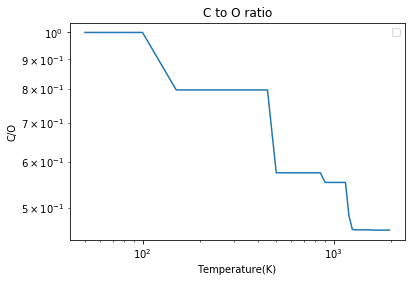

In [19]:
plt.figure()
plt.title('C to O ratio')
#plt.plot(Tmp,sld[:,3],label = 'C_sld')
plt.plot(Tmp,gas[:,3]/gas[:,5])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('C/O')
plt.xlabel('Temperature(K)')
#plt.plot(Tmp,sld[:,5],label = 'O_sld')
#plt.plot(Tmp,gas[:,5],label = 'O_gas')
plt.legend()
#plt.savefig('CtoO.png')
plt.show()

#print gas[:,3]/gas[:,5], '\n\n', gas[:,3], '\n\n', gas[:,5]

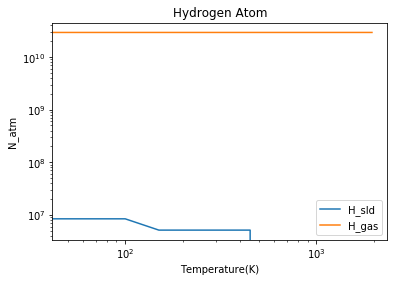

In [6]:
Tmp = np.arange(0,2000,50)
plt.figure()
plt.title('Hydrogen Atom')
plt.plot(Tmp,sld[:,0],label = 'H_sld')
plt.plot(Tmp,gas[:,0],label = 'H_gas')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('N_atm')
plt.xlabel('Temperature(K)')
#plt.savefig('Hydrogen_t.png')
plt.show()

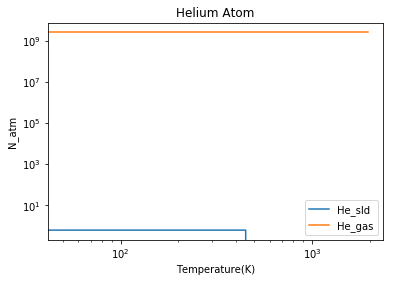

In [7]:

plt.figure()
plt.title('Helium Atom')
plt.plot(Tmp,sld[:,1],label = 'He_sld')
plt.plot(Tmp,gas[:,1],label = 'He_gas')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('N_atm')
plt.xlabel('Temperature(K)')
#plt.savefig('Helium_t.png')
plt.show()


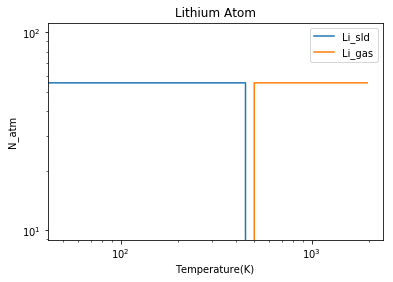

In [8]:

plt.figure()
plt.title('Lithium Atom')
plt.plot(Tmp,sld[:,2],label = 'Li_sld')
plt.plot(Tmp,gas[:,2],label = 'Li_gas')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('N_atm')
plt.xlabel('Temperature(K)')
#plt.savefig('Lithium_t.png')
plt.show()


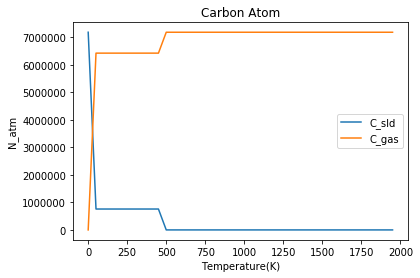

[      0. 6430000. 6430000. 6430000. 6430000. 6430000. 6430000. 6430000.
 6430000. 6430000. 7190000. 7190000. 7190000. 7190000. 7190000. 7190000.
 7190000. 7190000. 7190000. 7190000. 7190000. 7190000. 7190000. 7190000.
 7190000. 7190000. 7190000. 7190000. 7190000. 7190000. 7190000. 7190000.
 7190000. 7190000. 7190000. 7190000. 7190000. 7190000. 7190000. 7190000.]


In [9]:

plt.figure()
plt.title('Carbon Atom')
plt.plot(Tmp,sld[:,3],label = 'C_sld')
plt.plot(Tmp,gas[:,3],label = 'C_gas')
#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.ylabel('N_atm')
plt.xlabel('Temperature(K)')
#plt.savefig('Carbon_t.png')
plt.show()
print gas[:,3]

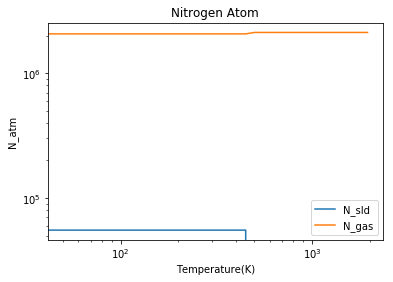

In [10]:


plt.figure()
plt.title('Nitrogen Atom')
plt.plot(Tmp,sld[:,4],label = 'N_sld')
plt.plot(Tmp,gas[:,4],label = 'N_gas')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('N_atm')
plt.xlabel('Temperature(K)')
#plt.savefig('Nitrogen_t.png')
plt.show()

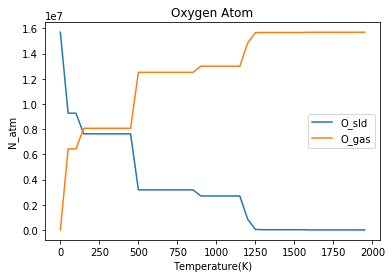

In [11]:
plt.figure()

plt.title('Oxygen Atom')
plt.plot(Tmp,sld[:,5],label = 'O_sld')
plt.plot(Tmp,gas[:,5],label = 'O_gas')
#plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.ylabel('N_atm')
plt.xlabel('Temperature(K)')
#plt.savefig('Oxygen_t.png')
plt.show()

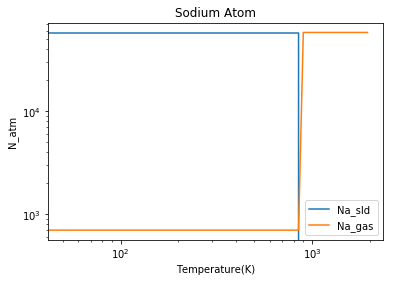

In [12]:


plt.figure()
plt.title('Sodium Atom')
plt.plot(Tmp,sld[:,6],label = 'Na_sld')
plt.plot(Tmp,gas[:,6],label = 'Na_gas')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('N_atm')
plt.xlabel('Temperature(K)')
#plt.savefig('Sodium_t.png')
plt.show()

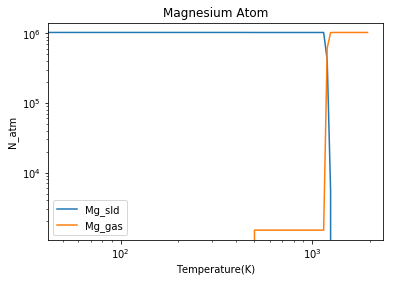

In [13]:


plt.figure()
plt.title('Magnesium Atom')
plt.plot(Tmp,sld[:,7],label = 'Mg_sld')
plt.plot(Tmp,gas[:,7],label = 'Mg_gas')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('N_atm')
plt.xlabel('Temperature(K)')
#plt.savefig('Magnesium_t.png')
plt.show()


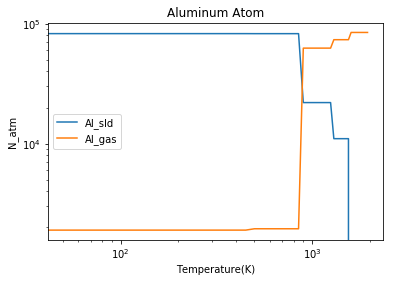

In [14]:

plt.figure()
plt.title('Aluminum Atom')
plt.plot(Tmp,sld[:,8],label = 'Al_sld')
plt.plot(Tmp,gas[:,8],label = 'Al_gas')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('N_atm')
plt.xlabel('Temperature(K)')
#plt.savefig('Aluminum_t.png')
plt.show()

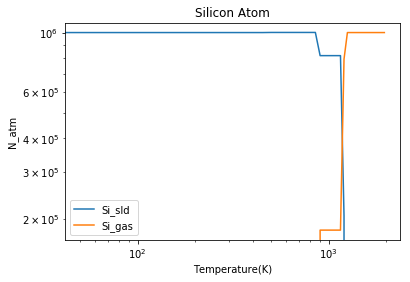

In [15]:


plt.figure()
plt.title('Silicon Atom')
plt.plot(Tmp,sld[:,9],label = 'Si_sld')
plt.plot(Tmp,gas[:,9],label = 'Si_gas')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('N_atm')
plt.xlabel('Temperature(K)')
#plt.savefig('Silicon_t.png')
plt.show()

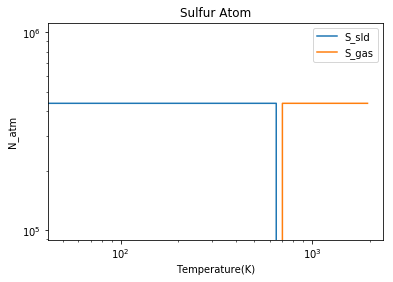

In [16]:


plt.figure()
plt.title('Sulfur Atom')
plt.plot(Tmp,sld[:,10],label = 'S_sld')
plt.plot(Tmp,gas[:,10],label = 'S_gas')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('N_atm')
plt.xlabel('Temperature(K)')
#plt.savefig('Sulfur_t.png')
plt.show()

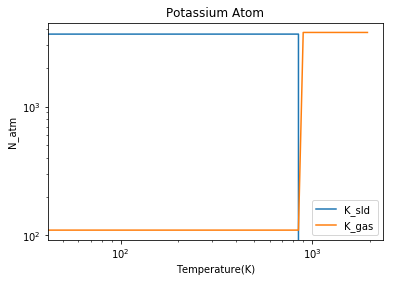

In [17]:


plt.figure()
plt.title('Potassium Atom')
plt.plot(Tmp,sld[:,11],label = 'K_sld')
plt.plot(Tmp,gas[:,11],label = 'K_gas')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('N_atm')
plt.xlabel('Temperature(K)')
#plt.savefig('Potassium_t.png')
plt.show()

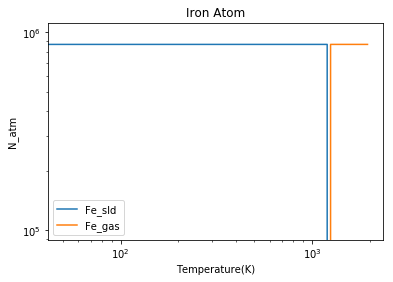

In [18]:


plt.figure()
plt.title('Iron Atom')
plt.plot(Tmp,sld[:,12],label = 'Fe_sld')
plt.plot(Tmp,gas[:,12],label = 'Fe_gas')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel('N_atm')
plt.xlabel('Temperature(K)')
#plt.savefig('Iron_t.png')
plt.show()